In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski

In [3]:
def split_foot(image):
    leftPad = 280
    rightPad = 1920 - 1630
    assert image.shape == (1080, 1920, 3)    
    return image[:,leftPad:880,:], image[:,1025:-rightPad,:]

In [4]:
image = cv.imread("/home/dima/Documents/альбрехт/обработка изображений/default/images/Img (copy 7).png", cv.IMREAD_UNCHANGED)

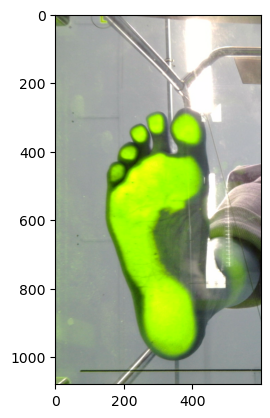

In [6]:
footL, footR = split_foot(image)
plt.imshow(footL)

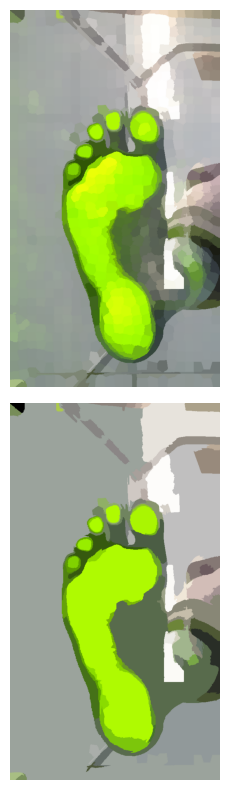

In [24]:
from skimage import data, segmentation, color
from skimage import graph
from matplotlib import pyplot as plt

img = footL

labels1 = segmentation.slic(img, compactness=15, n_segments=1000, start_label=1)
out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

g = graph.rag_mean_color(img, labels1)

labels2 = graph.cut_threshold(labels1, g, 29)

out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()